In [14]:
import numpy as np
import pandas as pd

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

from string import punctuation

from collections import Counter
from collections import OrderedDict

import matplotlib.pyplot as plt

from wordcloud import WordCloud


In [15]:
# data loaded on 13. October 2020
df = pd.read_csv("./drive/My Drive/Colab Notebooks/IRTG/Smart_contracts_paper/Literature Research/scopus.csv")
df = df[['Authors', 'Title', 'Year', 'Cited by', 'Abstract', 'Author Keywords']]

# correct year (conference 2019)
df.loc[df.Year<2016, 'Year'] = 2019

In [16]:
df['Author Keywords'] = df['Author Keywords'].str.lower()

#remove ethereum, smart contract, smart contracts, blockchain
df['Author Keywords'] = df['Author Keywords'].str.replace('blockchain;?', '')
df['Author Keywords'] = df['Author Keywords'].str.replace('smart contracts;?', '')
df['Author Keywords'] = df['Author Keywords'].str.replace('smart contract;?', '')
df['Author Keywords'] = df['Author Keywords'].str.replace('ethereum;?', '').str.strip()
df['Author Keywords'] = df['Author Keywords'].str.rstrip(';')

df['keywords_list']   = df['Author Keywords'].str.split(';')
df.rename(columns={'Author Keywords': 'keywords'}, inplace=True)
df.keywords.fillna('empty', inplace=True)

In [17]:
PATH = './drive/My Drive/Colab Notebooks/IRTG/Smart_contracts_paper/Literature Research/'

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# text preprocessing
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(df.keywords.values)
train_X = tokenizer.texts_to_sequences(df.keywords.values)
train_X = pad_sequences(train_X, maxlen=14, padding='post') # max 14


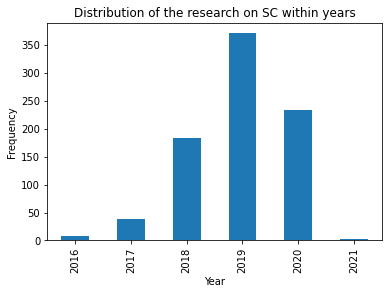

In [19]:
df.Year = pd.Categorical(df.Year, categories=list(range(2016, 2022)), ordered=True)
df.Year.value_counts(sort=False).plot.bar()
plt.title('Distribution of the research on SC within years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.savefig(f'{PATH}year_frequency_t.png', transparent=True)

In [20]:
# Join the different processed titles together.
long_string = ','.join(list(df.loc[df['keywords']!='empty','keywords'].values))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=1000, contour_width=3, contour_color='steelblue', background_color="rgba(255, 255, 255, 0)", mode="RGBA")

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()
wordcloud.to_file(f'{PATH}wordcloud_t.png')

#%matplotlib inline

#plt.savefig("/gdrive/My Drive/Colab Notebooks/IRTG/Smart_contracts_paper/Literature Research/wordcloud.png")

### BERT EMBEDDINGS